In [27]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
df = pd.read_csv('Iris.csv')

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.shape

(150, 6)

In [31]:
cols = df.columns
df.columns = [col.lower() for col in cols]
df.rename(columns={'id' : 'id', 
                    'sepallengthcm' : 'sepal_length_cm', 'sepalwidthcm' : 'sepal_width_cm', 
                   'petallengthcm' : 'petal_length_cm', 'petalwidthcm' : 'petal_width_cm', 'species' : 'species'},
                   inplace=True)

df.head()



,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

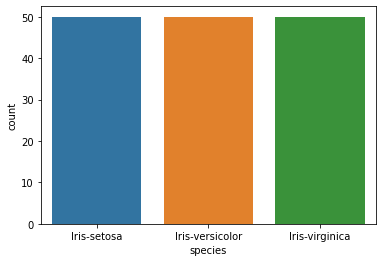

In [32]:
sns.countplot('species',data=df)

In [33]:
df.drop('id',axis=1, inplace=True)

In [34]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
X = df.iloc[:, 0:3].values
y = df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

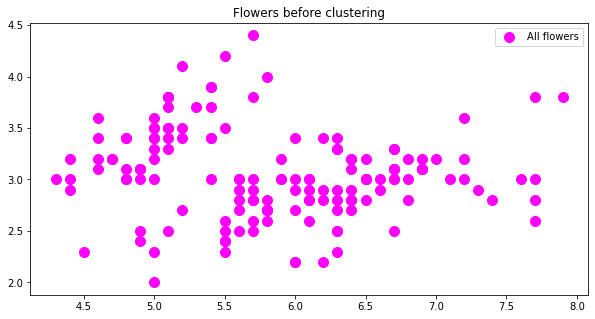

In [38]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='magenta',label='All flowers')
plt.title('Flowers before clustering')
plt.legend()
plt.show()

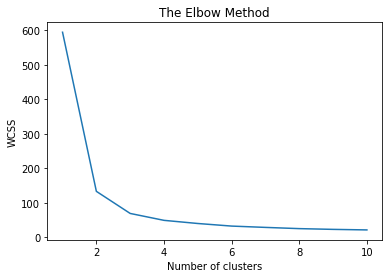

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [41]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [47]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [45]:
X[y_kmeans==0]

array([[7. , 3.2, 4.7],
       [6.9, 3.1, 4.9],
       [6.8, 2.8, 4.8],
       [6.7, 3. , 5. ],
       [6.7, 3.1, 4.7],
       [6.3, 3.3, 6. ],
       [7.1, 3. , 5.9],
       [6.3, 2.9, 5.6],
       [6.5, 3. , 5.8],
       [7.6, 3. , 6.6],
       [7.3, 2.9, 6.3],
       [6.7, 2.5, 5.8],
       [7.2, 3.6, 6.1],
       [6.5, 3.2, 5.1],
       [6.4, 2.7, 5.3],
       [6.8, 3. , 5.5],
       [6.4, 3.2, 5.3],
       [6.5, 3. , 5.5],
       [7.7, 3.8, 6.7],
       [7.7, 2.6, 6.9],
       [6.9, 3.2, 5.7],
       [7.7, 2.8, 6.7],
       [6.7, 3.3, 5.7],
       [7.2, 3.2, 6. ],
       [6.4, 2.8, 5.6],
       [7.2, 3. , 5.8],
       [7.4, 2.8, 6.1],
       [7.9, 3.8, 6.4],
       [6.4, 2.8, 5.6],
       [6.3, 2.8, 5.1],
       [6.1, 2.6, 5.6],
       [7.7, 3. , 6.1],
       [6.3, 3.4, 5.6],
       [6.4, 3.1, 5.5],
       [6.9, 3.1, 5.4],
       [6.7, 3.1, 5.6],
       [6.9, 3.1, 5.1],
       [6.8, 3.2, 5.9],
       [6.7, 3.3, 5.7],
       [6.7, 3. , 5.2],
       [6.5, 3. , 5.2],
       [6.2, 3.4

In [44]:
X[y_kmeans==0,0]

array([7. , 6.9, 6.8, 6.7, 6.7, 6.3, 7.1, 6.3, 6.5, 7.6, 7.3, 6.7, 7.2,
       6.5, 6.4, 6.8, 6.4, 6.5, 7.7, 7.7, 6.9, 7.7, 6.7, 7.2, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.9, 6.7, 6.9, 6.8, 6.7,
       6.7, 6.5, 6.2])

In [43]:
kmeans.cluster_centers_

array([[6.83571429, 3.06428571, 5.6547619 ],
       [5.006     , 3.418     , 1.464     ],
       [5.84655172, 2.73275862, 4.3637931 ]])

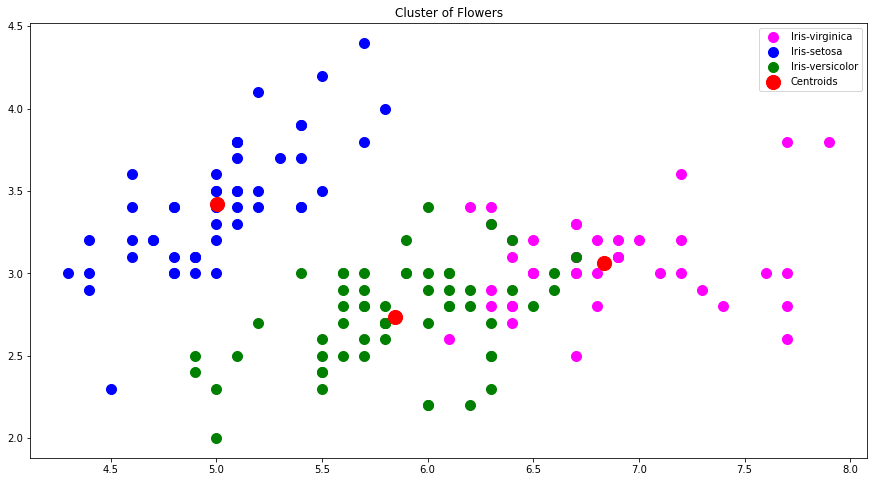

In [49]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Iris-virginica')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Flowers')
plt.legend()
plt.show()

In [50]:
kmeans.cluster_centers_

array([[6.83571429, 3.06428571, 5.6547619 ],
       [5.006     , 3.418     , 1.464     ],
       [5.84655172, 2.73275862, 4.3637931 ]])

In [ ]:
#Hierarchical

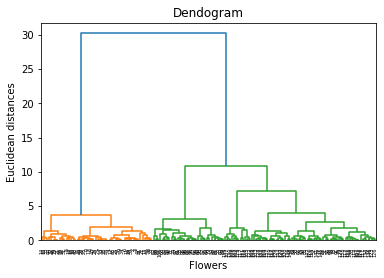

In [51]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Flowers')
plt.ylabel('Euclidean distances')
plt.show()

In [54]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [55]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

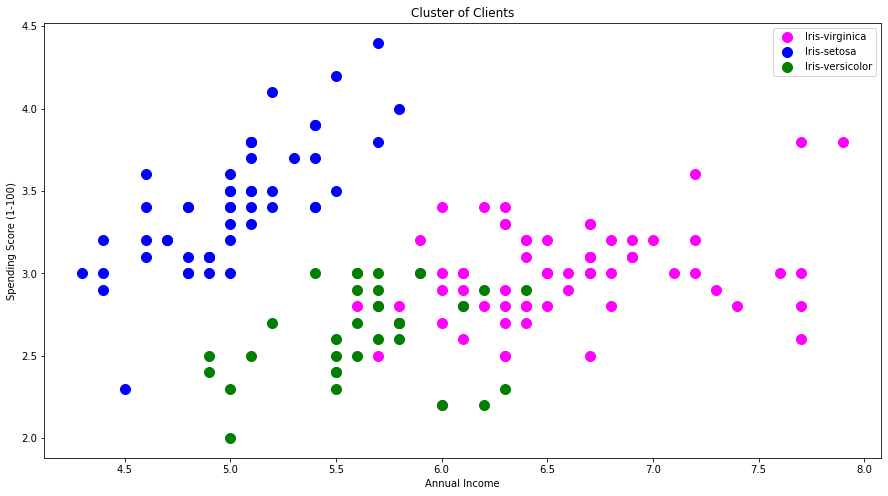

In [56]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Iris-virginica')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Iris-versicolor')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()